# Advanced Coding Group Project - 2024/25 
#### Students: Michele Turco, Mattia Cervelli, Lorenzo Laterza 

## 0) Import Libraries and the Dataset

Setup your python environment and download the credit-score data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credit_card_df = pd.read_csv('train_biased.csv')

## 1) Understanding the dataset



#### 1.1) General overview of the dataset

Using the function .head(), we can extract from the dataset the first x rows (x=5 by default, but we can change this number). They are not useful for analytic purposes, but still enable us to visualize the dataset.

In [3]:
credit_card_df.head

<bound method NDFrame.head of             ID Customer_ID     Month           Name          City  \
0          NaN   CUS_0xd40       NaN  Aaron Maashoh        Lonton   
1       0x1603   CUS_0xd40  February  Aaron Maashoh        Lonton   
2       0x1604   CUS_0xd40       NaN            NaN        Lonton   
3       0x1605   CUS_0xd40     April  Aaron Maashoh        Lonton   
4          NaN   CUS_0xd40       May  Aaron Maashoh        Lonton   
...        ...         ...       ...            ...           ...   
99995  0x25fe9  CUS_0x942c     April          Nicks      BadShire   
99996  0x25fea  CUS_0x942c       May          Nicks      BadShire   
99997  0x25feb         NaN      June          Nicks      BadShire   
99998  0x25fec  CUS_0x942c      July          Nicks  Standhampton   
99999  0x25fed  CUS_0x942c    August          Nicks      BadShire   

              Street    Age          SSN Occupation Annual_Income  ...  \
0      Oxford Street    NaN  821-00-0265    Manager      19114.12  

#### 1.2) Showing the dataset shape

In [4]:
# Identify Number of Columns and Rows
n_rows = len(credit_card_df)
n_columns = len(credit_card_df.columns)
print(f"The dataset contains {n_columns} columns")
print(f"The dataset contains {n_rows} rows")

The dataset contains 27 columns
The dataset contains 100000 rows


#### 1.3) Gathering information from data



In [5]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        90058 non-null   object 
 1   Customer_ID               90107 non-null   object 
 2   Month                     90062 non-null   object 
 3   Name                      81113 non-null   object 
 4   City                      90149 non-null   object 
 5   Street                    90080 non-null   object 
 6   Age                       85512 non-null   float64
 7   SSN                       89999 non-null   object 
 8   Occupation                90056 non-null   object 
 9   Annual_Income             89906 non-null   object 
 10  Monthly_Inhand_Salary     76405 non-null   float64
 11  Num_Bank_Accounts         90167 non-null   float64
 12  Num_Credit_Card           89938 non-null   float64
 13  Interest_Rate             90151 non-null   fl

In [6]:
credit_card_df.nunique()

ID                          90058
Customer_ID                 12500
Month                           8
Name                        10139
City                            4
Street                         31
Age                          1501
SSN                         12501
Occupation                     21
Annual_Income               18438
Monthly_Inhand_Salary       13204
Num_Bank_Accounts             879
Num_Credit_Card              1132
Interest_Rate                1597
Num_of_Loan                   399
Type_of_Loan                 6260
Delay_from_due_date            73
Num_of_Delayed_Payment        684
Changed_Credit_Limit         4314
Num_Credit_Inquiries         1124
Credit_Mix                      4
Outstanding_Debt            13088
Credit_Utilization_Ratio    90025
Credit_History_Age            404
Payment_of_Min_Amount           3
Amount_invested_monthly     81866
Credit_Score                    4
dtype: int64

#### 1.4) Missing values

In [7]:
missing_values = credit_card_df.isnull().sum()
missing_values

ID                           9942
Customer_ID                  9893
Month                        9938
Name                        18887
City                         9851
Street                       9920
Age                         14488
SSN                         10001
Occupation                   9944
Annual_Income               10094
Monthly_Inhand_Salary       23595
Num_Bank_Accounts            9833
Num_Credit_Card             10062
Interest_Rate                9849
Num_of_Loan                 10191
Type_of_Loan                20312
Delay_from_due_date          9988
Num_of_Delayed_Payment      16218
Changed_Credit_Limit        10067
Num_Credit_Inquiries        11898
Credit_Mix                   9915
Outstanding_Debt             9963
Credit_Utilization_Ratio     9975
Credit_History_Age          18209
Payment_of_Min_Amount        9957
Amount_invested_monthly     14120
Credit_Score                    0
dtype: int64

#### 1.5) Data Types Check

In [8]:
##Selecting numerical features
numerical_data = credit_card_df.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features = numerical_data.columns.tolist()

#Selecting categoricalfeatures
categorical_data = credit_card_df.select_dtypes(include= 'object')
#append the features of categorical_data to list
categorical_features = categorical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)
print('\n')
print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 9 numerical features: 

['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Credit_Score']


There are 18 categorical features: 

['ID', 'Customer_ID', 'Month', 'Name', 'City', 'Street', 'SSN', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly']


In [9]:
credit_card_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,85512.0,110.226845,684.907588,-500.000000,24.000000,33.000000,42.000000,8698.000000
Monthly_Inhand_Salary,76405.0,4185.789272,3178.560506,303.645417,1625.023750,3086.683333,5940.317500,15204.633333
Num_Bank_Accounts,90167.0,17.105172,117.728215,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,89938.0,22.449410,129.037233,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,90151.0,72.343923,465.684822,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,90012.0,21.081156,14.862707,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,88102.0,27.846882,193.610843,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,90025.0,32.290967,5.114670,20.100770,28.064418,32.318280,36.502272,50.000000
Credit_Score,100000.0,1.880640,0.683065,0.000000,1.000000,2.000000,2.000000,3.000000


In [10]:
credit_card_df.describe(include="object").T

,count,unique,top,freq
ID,90058,90058,0x25fed,1
Customer_ID,90107,12500,CUS_0x8600,8
Month,90062,8,April,11319
Name,81113,10139,Langep,42
City,90149,4,Standhampton,47744
Street,90080,31,Quality Street,5343
SSN,89999,12501,#F%$D@*&8,5008
Occupation,90056,21,Journalist,17002
Annual_Income,89906,18438,95596.35,15
Num_of_Loan,89809,399,3,12898


#### 1.6) Distribution of numerical variables

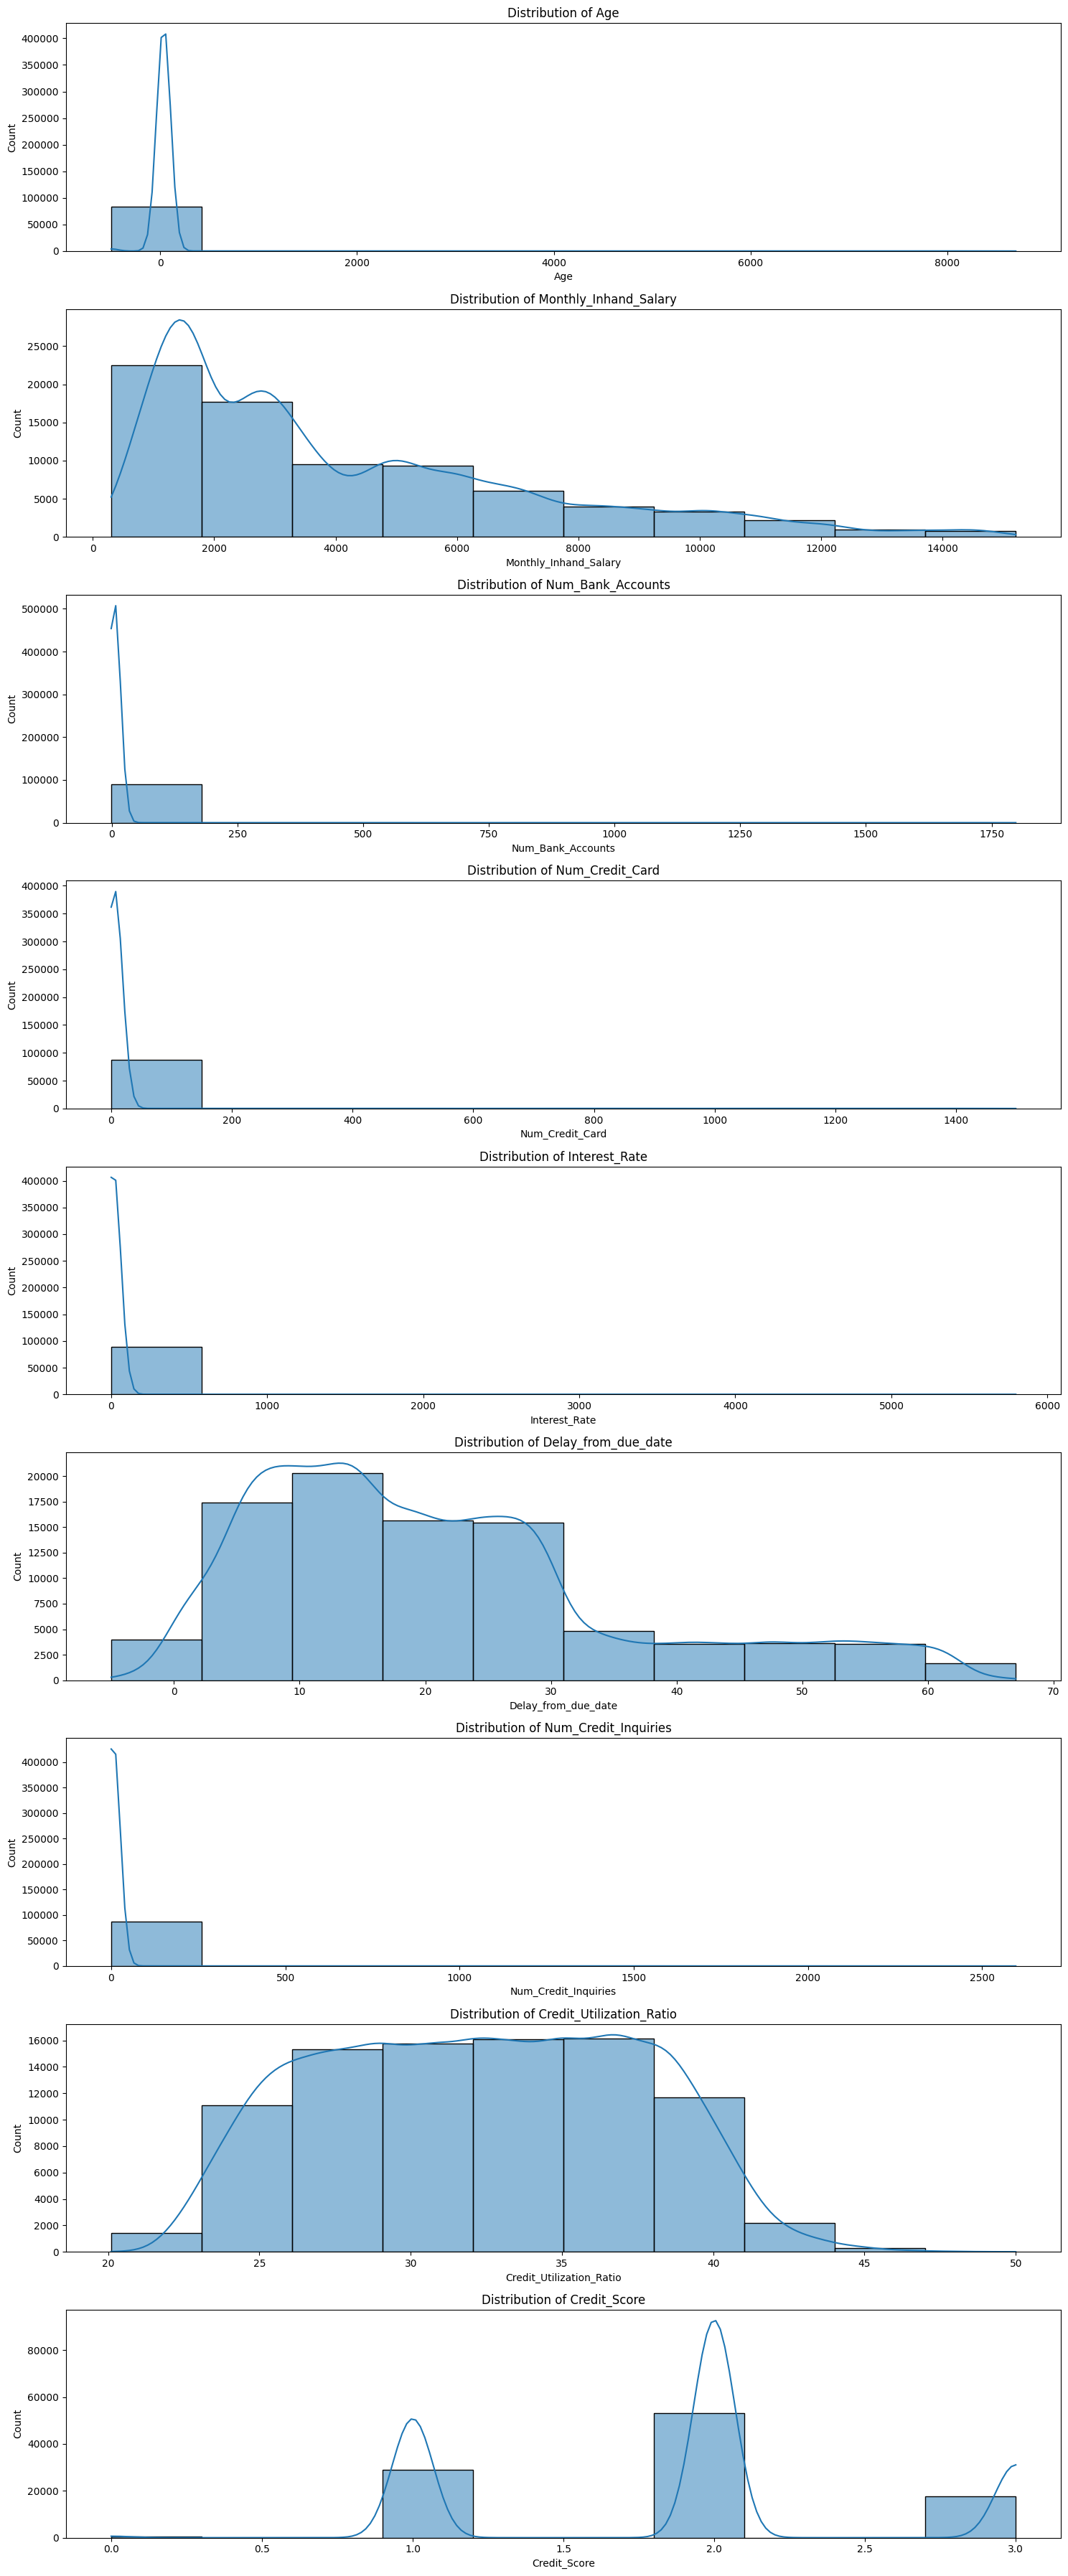

In [11]:
# Loop through all numerical columns and plot their distributions : it does not work yet!!!!!
numeric_cols = credit_card_df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, len(numeric_cols) * 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.histplot(credit_card_df[col], kde=True, bins=10)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

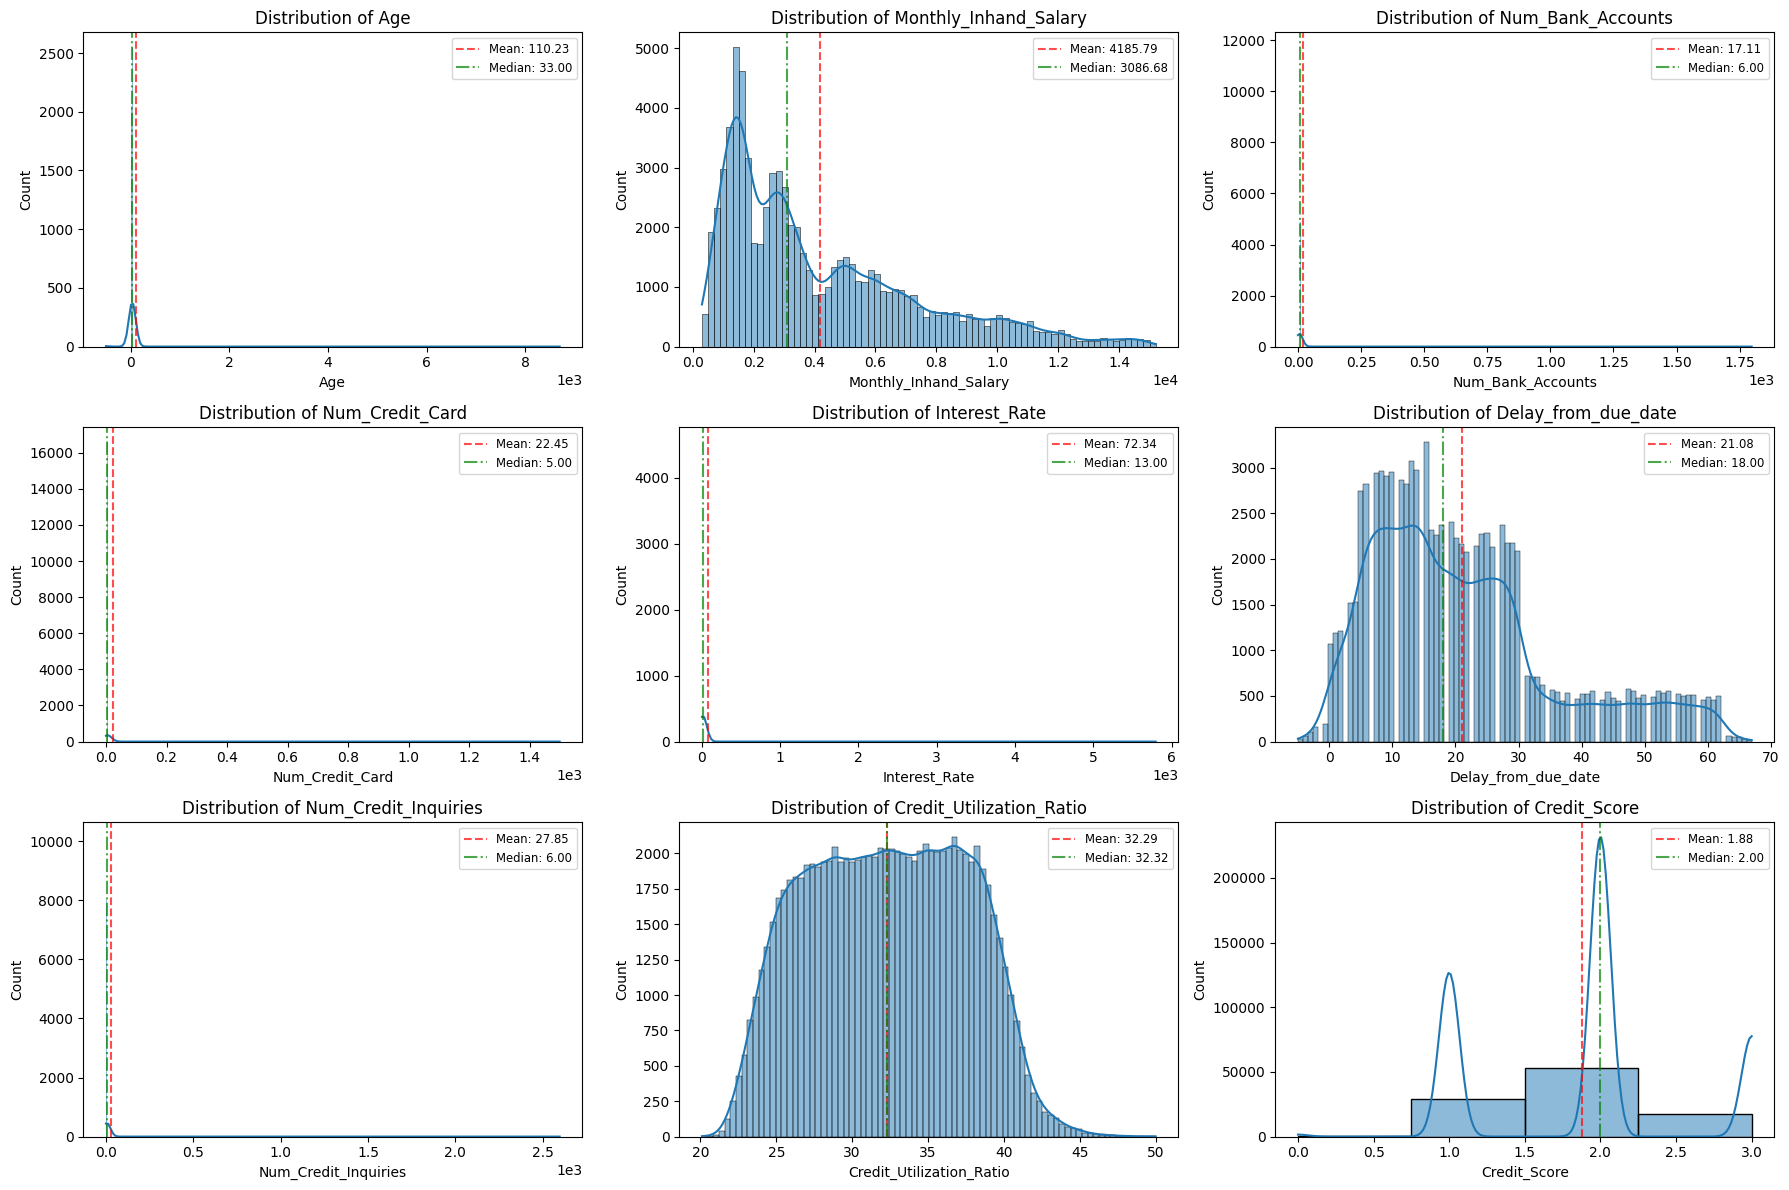

In [12]:
numeric_cols = credit_card_df.select_dtypes(include=['number']).columns

# Create a grid layout for better visualization
n_cols = 3  # Number of columns in the grid
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calculate required number of rows

# Create subplots with a grid layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through all numerical columns and plot their distributions
for i, col in enumerate(numeric_cols):
    # Determine appropriate number of bins based on data characteristics
    if credit_card_df[col].nunique() < 10:
        bins = credit_card_df[col].nunique()  # Discrete data with few values
    else:
        bins = 'auto'  # Let Seaborn determine optimal bins
    
    # Create histogram with kernel density estimate
    sns.histplot(data=credit_card_df, x=col, kde=True, bins=bins, ax=axes[i])
    
    # Add mean and median lines for reference
    mean_val = credit_card_df[col].mean()
    median_val = credit_card_df[col].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='-.', alpha=0.7, label=f'Median: {median_val:.2f}')
    
    # Add legend and title
    axes[i].legend(fontsize='small')
    axes[i].set_title(f'Distribution of {col}')
    
    # Handle axis labels for better readability
    if credit_card_df[col].max() > 1000:
        axes[i].ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np

def clean_and_convert_numeric_columns(df, potentially_numeric_columns):
    """
    Clean and convert columns that should be numeric but contain formatting issues.
    Track NaN values before and after conversion.
    
    Parameters:
      df: DataFrame containing the data
      potentially_numeric_columns: List of column names that should be numeric
    
    Returns:
      DataFrame with cleaned numeric columns and a summary dictionary
    """
    df_cleaned = df.copy()
    
    # Create a summary dictionary to track changes
    summary = {}
    
    for col in potentially_numeric_columns:
        if col in df.columns:
            # Count initial NaN values and total values
            initial_nan_count = df[col].isna().sum()
            total_values = len(df[col])
            
            # If column is already numeric, no conversion is performed.
            if pd.api.types.is_numeric_dtype(df[col]):
                summary[col] = {
                    'already_numeric': True,
                    'initial_nan_count': initial_nan_count,
                    'final_nan_count': initial_nan_count,
                    'new_nan_count': 0,
                    'total_values': total_values,
                    'conversion_rate': None  # Not applicable since no conversion occurred
                }
                continue
                
            # For columns that should be numeric but aren't:
            try:
                # Convert column to string (to ensure uniform processing)
                temp_series = df[col].astype(str)
                
                # Remove common non-numeric characters/patterns
                temp_series = temp_series.str.replace('_', '')
                temp_series = temp_series.str.replace(',', '')
                temp_series = temp_series.str.replace('$', '')
                temp_series = temp_series.str.replace('%', '')
                temp_series = temp_series.str.replace(' ', '')
                
                # Convert cleaned strings to numeric, coercing errors to NaN
                df_cleaned[col] = pd.to_numeric(temp_series, errors='coerce')
                
                # Count final NaN values and determine how many new NaNs were introduced
                final_nan_count = df_cleaned[col].isna().sum()
                new_nan_count = final_nan_count - initial_nan_count
                
                # Calculate conversion rate as the percentage of originally non-NaN values
                # that were successfully converted.
                non_na_original = total_values - initial_nan_count
                if non_na_original > 0:
                    conversion_rate = (non_na_original - new_nan_count) / non_na_original
                else:
                    conversion_rate = 0
                
                # Store summary statistics
                summary[col] = {
                    'already_numeric': False,
                    'initial_nan_count': initial_nan_count,
                    'final_nan_count': final_nan_count,
                    'new_nan_count': new_nan_count,
                    'total_values': total_values,
                    'conversion_rate': conversion_rate
                }
                
            except Exception as e:
                print(f"Error converting {col}: {str(e)}")
                summary[col] = {
                    'already_numeric': False,
                    'error': str(e),
                    'initial_nan_count': initial_nan_count
                }
    
    # Print summary table (without the NaN Rate column)
    print("\nSummary Table:")
    print("-" * 80)
    print(f"{'Column':<25} {'Initial NaNs':<15} {'Final NaNs':<15} {'New NaNs':<15} {'Conversion Rate'}")
    print("-" * 80)
    
    for col, stats in summary.items():
        if 'error' in stats:
            print(f"{col:<25} {stats['initial_nan_count']:<15} {'ERROR':<15} {'N/A':<15} {'N/A'}")
        else:
            conv_rate = stats.get('conversion_rate')
            conv_rate_str = "N/A" if conv_rate is None else f"{conv_rate:.2%}"
            print(
                f"{col:<25} "
                f"{stats['initial_nan_count']:<15} "
                f"{stats['final_nan_count']:<15} "
                f"{stats['new_nan_count']:<15} "
                f"{conv_rate_str}"
            )
    
    return df_cleaned, summary

# List of columns that should be numeric
should_be_numeric = [
    'Annual_Income', 
    'Num_of_Loan', 
    'Num_of_Delayed_Payment', 
    'Changed_Credit_Limit', 
    'Outstanding_Debt', 
    'Amount_invested_monthly'
]

# Clean and convert the data
credit_card_cleaned, cleaning_summary = clean_and_convert_numeric_columns(credit_card_df, should_be_numeric)

# Check which columns are now numeric vs categorical
numeric_cols = credit_card_cleaned.select_dtypes(include=['number']).columns.tolist()
categorical_cols = credit_card_cleaned.select_dtypes(exclude=['number']).columns.tolist()

print(f"\nAfter cleaning, there are {len(numeric_cols)} numerical features: \n{numeric_cols}")
print(f"\nAfter cleaning, there are {len(categorical_cols)} categorical features: \n{categorical_cols}")

# Now let's examine problematic values that caused NaNs
print("\nExamining problematic values that were converted to NaN:")
for col in should_be_numeric:
    if col in cleaning_summary and cleaning_summary[col].get('new_nan_count', 0) > 0:
        print(f"\nColumn {col} problematic values:")
        
        # Find the indices where values became NaN after conversion
        if not pd.api.types.is_numeric_dtype(credit_card_df[col]):
            # Get original non-NA values that became NA after conversion
            original_values = credit_card_df[col][~credit_card_df[col].isna()]
            indices_that_became_nan = original_values.index[credit_card_cleaned[col].isna()[original_values.index]]
            
            if len(indices_that_became_nan) > 0:
                # Show a sample of problematic values
                sample_size = min(10, len(indices_that_became_nan))
                sample_indices = np.random.choice(indices_that_became_nan, sample_size, replace=False)
                
                print("Sample of original values that couldn't be converted:")
                for idx in sample_indices:
                    print(f"  Index {idx}: '{credit_card_df.loc[idx, col]}'")
13817 


Summary Table:
--------------------------------------------------------------------------------
Column                    Initial NaNs    Final NaNs      New NaNs        Conversion Rate
--------------------------------------------------------------------------------
Annual_Income             10094           10094           0               100.00%
Num_of_Loan               10191           10191           0               100.00%
Num_of_Delayed_Payment    16218           16218           0               100.00%
Changed_Credit_Limit      10067           11942           1875            97.92%
Outstanding_Debt          9963            9963            0               100.00%
Amount_invested_monthly   14120           14120           0               100.00%

After cleaning, there are 15 numerical features: 
['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Lim

In [38]:
def clean_changed_credit_limit(df):
    """
    Special cleaning function for the Changed_Credit_Limit column.
    Handles cases with just underscores or other non-numeric entries.
    
    Parameters:
    df: DataFrame containing the Changed_Credit_Limit column
    
    Returns:
    Series with cleaned numeric values
    """
    # Make a copy to avoid modifying the original dataframe
    cleaned_series = df['Changed_Credit_Limit'].copy()
    
    # Count values before cleaning
    total_values = len(cleaned_series)
    missing_before = cleaned_series.isna().sum()
    
    # Track number of replaced values
    underscore_only_count = 0
    other_invalid_count = 0
    
    # If already numeric, just return it
    if pd.api.types.is_numeric_dtype(cleaned_series):
        print(f"Changed_Credit_Limit is already numeric. {missing_before} missing values out of {total_values}.")
        return cleaned_series
    
    # Convert to string for cleaning
    cleaned_series = cleaned_series.astype(str)
    
    # Replace values that are just underscores with NaN
    underscore_mask = cleaned_series.str.strip() == '_'
    underscore_only_count = underscore_mask.sum()
    cleaned_series.loc[underscore_mask] = np.nan
    
    # Clean remaining values by removing non-numeric characters
    valid_values_mask = ~cleaned_series.isna()
    
    if valid_values_mask.any():
        # Remove common non-numeric characters from remaining values
        cleaned_series.loc[valid_values_mask] = (
            cleaned_series
            .loc[valid_values_mask]
            .str.replace('_', '')
            .str.replace(',', '')
            .str.replace('$', '')
            .str.replace('%', '')
            .str.replace(' ', '')
        )
    
    # Convert to numeric, tracking which values couldn't be converted
    numeric_series = pd.to_numeric(cleaned_series, errors='coerce')
    
    # Count new NaNs created during the final conversion
    other_invalid_mask = ~underscore_mask & ~cleaned_series.isna() & numeric_series.isna()
    other_invalid_count = other_invalid_mask.sum()
    
    # Count values after cleaning
    missing_after = numeric_series.isna().sum()
    
    # Print summary
    print(f"\nChanged_Credit_Limit Cleaning Summary:")
    print(f"Total values: {total_values}")
    print(f"Missing values before: {missing_before} ({missing_before/total_values:.2%})")
    print(f"Values with just '_': {underscore_only_count} ({underscore_only_count/total_values:.2%})")
    print(f"Other invalid values: {other_invalid_count} ({other_invalid_count/total_values:.2%})")
    print(f"Missing values after: {missing_after} ({missing_after/total_values:.2%})")
    print(f"Successfully converted: {total_values-missing_after} ({(total_values-missing_after)/total_values:.2%})")
    
    # If many values are missing, suggest a strategy
    if missing_after/total_values > 0.3:  # Over 30% missing
        print("\nRecommendation: Consider treating this as a binary feature (changed/not changed)")
        print("or imputing missing values based on other features.")
    
    return numeric_series

# Apply the special cleaning to Changed_Credit_Limit
credit_card_cleaned['Changed_Credit_Limit'] = clean_changed_credit_limit(credit_card_df)

# Let's also check if it makes sense to convert this to a binary feature
unique_values = credit_card_cleaned['Changed_Credit_Limit'].dropna().unique()
print(f"\nUnique values in Changed_Credit_Limit after cleaning: {sorted(unique_values)}")




Changed_Credit_Limit Cleaning Summary:
Total values: 100000
Missing values before: 10067 (10.07%)
Values with just '_': 1875 (1.88%)
Other invalid values: 10067 (10.07%)
Missing values after: 11942 (11.94%)
Successfully converted: 88058 (88.06%)

Unique values in Changed_Credit_Limit after cleaning: [-6.49, -6.48, -6.45, -6.44, -6.43, -6.39, -6.37, -6.35, -6.32, -6.3100000000000005, -6.28, -6.27, -6.25, -6.23, -6.2, -6.19, -6.1, -6.07, -6.02, -6.01, -6.0, -5.99, -5.95, -5.93, -5.92, -5.9, -5.86, -5.85, -5.82, -5.8, -5.78, -5.77, -5.76, -5.75, -5.74, -5.7, -5.66, -5.65, -5.63, -5.61, -5.58, -5.57, -5.55, -5.52, -5.5, -5.49, -5.48, -5.43, -5.42, -5.41, -5.38, -5.37, -5.35, -5.34, -5.32, -5.3100000000000005, -5.29, -5.25, -5.24, -5.23, -5.22, -5.2, -5.19, -5.17, -5.12, -5.11, -5.1, -5.05, -5.03, -5.02, -5.01, -5.0, -4.99, -4.98, -4.97, -4.95, -4.94, -4.9, -4.8900000000000015, -4.88, -4.87, -4.86, -4.84, -4.82, -4.8, -4.79, -4.78, -4.77, -4.76, -4.75, -4.74, -4.73, -4.72, -4.7, -4.69, -4.

In [41]:
# Create a DataFrame from the cleaning_summary dictionary
summary_df = pd.DataFrame.from_dict(cleaning_summary, orient='index')

# Convert the conversion_rate to a percentage string for display.
if 'conversion_rate' in summary_df.columns:
    summary_df['conversion_rate'] = summary_df['conversion_rate'].apply(lambda x: f"{x:.2%}" if pd.notnull(x) else "N/A")

# Optionally reorder the columns
cols_order = ['already_numeric', 'initial_nan_count', 'final_nan_count', 'new_nan_count', 'conversion_rate']
summary_df = summary_df[cols_order]

print("\nDetailed Cleaning Summary Table:")
print(summary_df)


Detailed Cleaning Summary Table:
                         already_numeric  initial_nan_count  final_nan_count  \
Annual_Income                      False              10094            10094   
Num_of_Loan                        False              10191            10191   
Num_of_Delayed_Payment             False              16218            16218   
Changed_Credit_Limit               False              10067            11942   
Outstanding_Debt                   False               9963             9963   
Amount_invested_monthly            False              14120            14120   

                         new_nan_count conversion_rate  
Annual_Income                        0          89.91%  
Num_of_Loan                          0          89.81%  
Num_of_Delayed_Payment               0          83.78%  
Changed_Credit_Limit              1875          88.06%  
Outstanding_Debt                     0          90.04%  
Amount_invested_monthly              0          85.88%  


Plot the distribution of credit card score respect to a normal distribution to see i there are skewnesses

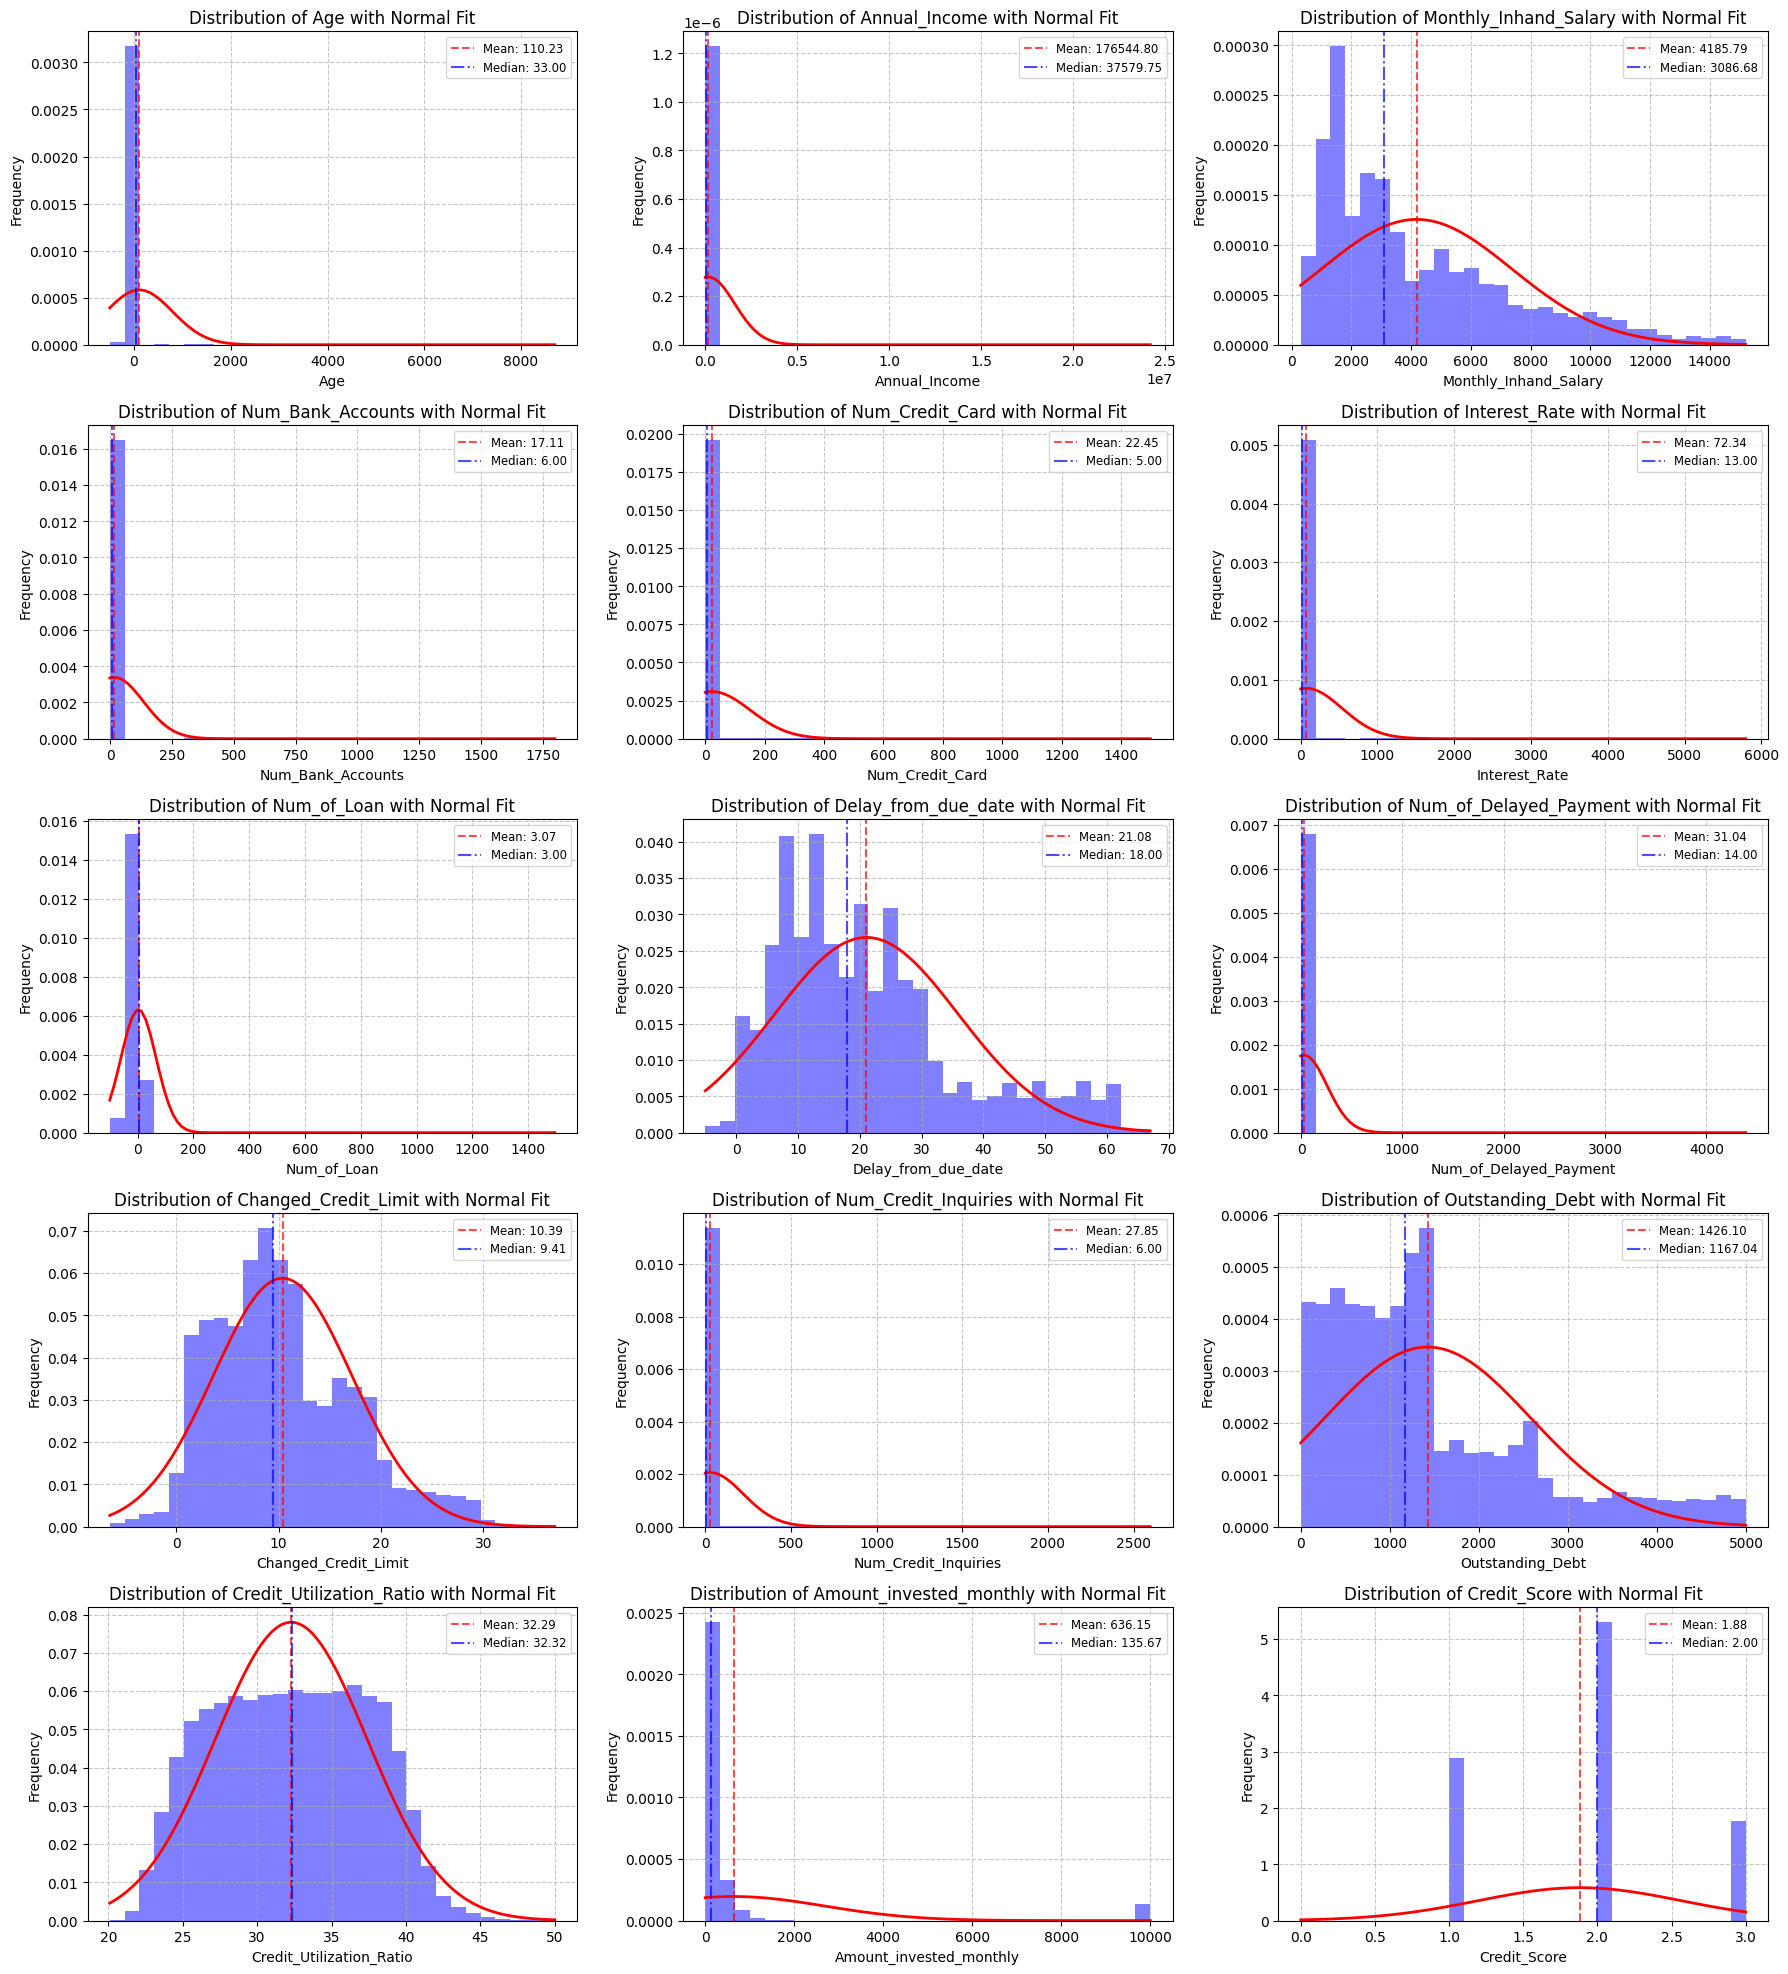

In [31]:
from scipy.stats import norm
import numpy as np

# Get the list of numerical feature names from the cleaned dataframe.
numeric_features = credit_card_cleaned.select_dtypes(include=['number']).columns
n_features = len(numeric_features)

# Define grid size
n_cols = 3  # Number of columns in the grid
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate required number of rows

# Create subplots with a grid layout
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through all numerical features and plot their distributions
for i, col in enumerate(numeric_features):
    ax = axes[i]
    data = credit_card_cleaned[col].dropna()
    
    # Plot histogram with density normalization
    ax.hist(data, bins=30, density=True, alpha=0.5, color='blue')
    
    # Fit a normal distribution to the data and plot it
    mu, std = norm.fit(data)
    x = np.linspace(data.min(), data.max(), 100)
    y = norm.pdf(x, mu, std)
    ax.plot(x, y, 'r-', lw=2)
    
    # Add vertical lines for mean and median
    mean_val = data.mean()
    median_val = data.median()
    ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='blue', linestyle='-.', alpha=0.7, label=f'Median: {median_val:.2f}')
    
    # Add legend, grid, and style ticks
    ax.legend(fontsize='small')
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)
    
    # Set titles and labels
    ax.set_title(f'Distribution of {col} with Normal Fit')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Remove any unused subplots if n_features is not a multiple of n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()